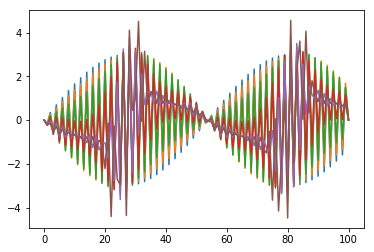

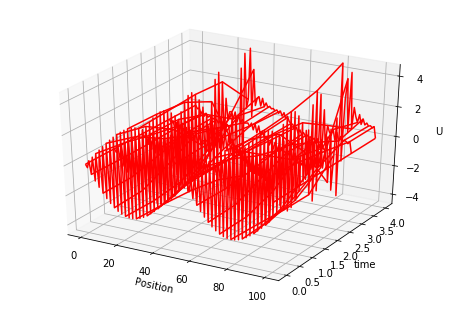

beta 1.0 dt 1.0


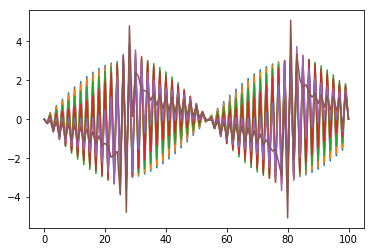

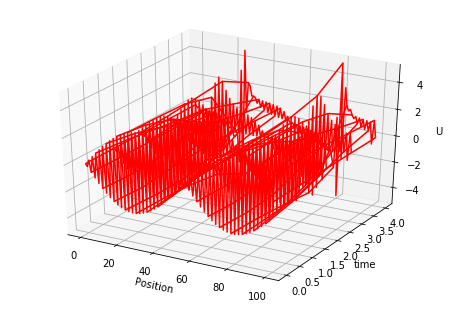

beta 0.5 dt 0.5


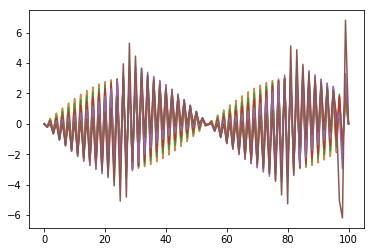

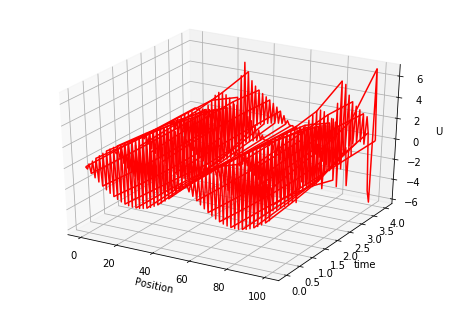

beta 0.1 dt 0.1


In [14]:
# Burgers equation with Lax wendroff upwind method
%matplotlib inline
import numpy as np
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 

for x in [1,0.5,0.1]:
    L,Nx = 100, 101
    tend, vel = 4.5, 1
    Dtout = 1
    dx = L/(Nx-1)
    dt = x*dx/vel
    epsilon = 1
    beta = epsilon*dt/dx
    x = np.arange(0,Nx-1,dx)
    U = np.zeros((Nx,2), float)
    Up = np.zeros((Nx,int(tend/Dtout)+1),float) 


    for i in range(1,Nx-1):
        U[i,0] = 3*np.sin(3.2*i*dx)

    for i in range(1,int((Nx-1)/2)):
        U[i,0] = 3*np.sin(3.2*i*dx)

    toutn = 0
    t = 0
    p.plot(U[:,0])
    while t < tend:                                  
        for ix in range (1, Nx - 1):   
            U[ix, 1] = U[ix,0]-(beta/4)*(U[ix+1,0]**2-U[ix-1,0]**2)+(beta**2/8)*((U[ix+1,0]+U[ix,0])*(U[ix+1,0]**2-U[ix,0]**2)-(U[ix,0]+U[ix-1,0])*(U[ix,0]**2-U[ix-1,0]**2))
        if t >= toutn*Dtout: 
            p.plot(U[:,1])
            Up[:,toutn] = U[:,1]     
            toutn += 1                        
        for ix in range (1, Nx - 1):  U[ix, 0] = U[ix, 1]
        t += dt

    x = list(range(0, Nx))                       # Plot alternate pts
    y = list(range(0, int(tend/Dtout)+1))                      

    X, Y = p.meshgrid(x, y) 


    def functz(Tpl):                            
        z = Tpl[X, Y]       
        return z

    Z = functz(Up)              


    fig = p.figure()                                          # Create figure


    ax = Axes3D(fig)                                              
    ax.plot_wireframe(X, Y, Z, color = 'r')                    
    ax.set_xlabel('Position')                                     
    ax.set_ylabel('time')
    ax.set_zlabel('U')
    p.show()                               
    print("beta",beta,"dt",dt)

Beta is inversely proportional to accuracy.  This method is superior to the Upwind method as it has higher accuracy overall since it is second order.